<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter2_Supervised_Learning/ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **第二章 - 监督学习**

这个Jupyter笔记本包含了第二章的所有源代码.

In [0]:
import numpy as np

def weak_learner():
    ''' 定义一个只有55%准确率的弱分类器 '''
    n = np.random.randint(0, 100)
    if n >= 45:
        return 1
    else:
        return 0
      
def majority_voting(results:list):
    ''' 定义多数投票法 '''
    if results.count(1) > results.count(0):
        majority_class = 1
    else:
        majority_class = 0
    return majority_class

def ensemble_model(learner, num_learners = 1000):
    ''' 定义1000个弱分类器的集成模型 '''
    all_results = []
    for i in range(num_learners):
        result = learner()
        all_results.append(result)
    return majority_voting(all_results)

In [6]:
# Simulate 10, 000 samples to approximate the accuracy
num_samples = 10000
all_weak_learner_results = []
all_ensemble_model_results = []

for i in range(num_samples):
    weak_learner_result = weak_learner()
    ensemble_model_result = ensemble_model(weak_learner)
    all_weak_learner_results.append(weak_learner_result)
    all_ensemble_model_results.append(ensemble_model_result)
    weak_learner_accuracy = all_weak_learner_results.count(1)/num_samples
    ensemble_model_accuracy = all_ensemble_model_results.count(1)/num_samples
        
print('The weak learner only achieves accuracy of', weak_learner_accuracy) 
print('The ensemble model achieves accuracy as high as', ensemble_model_accuracy)

The weak learner only achieves accuracy of 0.5519
The ensemble model achieves accuracy as high as 0.9989


In [0]:

num_learners_list = np.arange(1,1000,2)
num_samples = 1000
all_accuracy = []

for i in num_learners_list:
    np.random.seed(0)
 
    all_ensemble_model_results = []
    for j in range(num_samples):
        ensemble_model_result = ensemble_model(weak_learner, i)
        all_ensemble_model_results.append(ensemble_model_result)
        ensemble_model_accuracy = all_ensemble_model_results.count(1)/num_samples
    all_accuracy.append(ensemble_model_accuracy)

Text(0, 0.5, 'Accuracy')

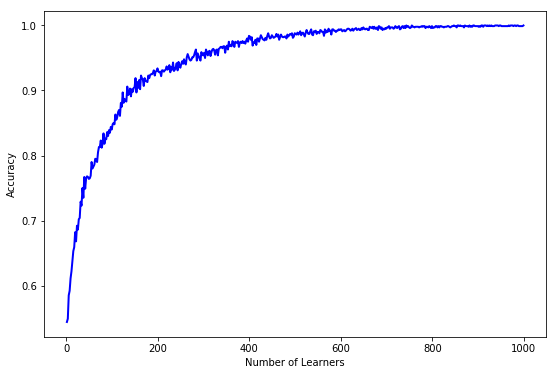

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(num_learners_list, all_accuracy, 'b', linewidth = 2)
plt.xlabel('Number of Learners')
plt.ylabel('Accuracy')